# COGS 118A - Final Project

# An Exploration Into Different Algorithms For Spotify Recommendation

## Group members

- Wesley Nguyen
- Jay Buensuceso
- Aniket Dhar
- Juhita Vijjali

# Abstract 

The goal of this project is to design a more organic recommendation system for music, leveraging the Spotify API. The recorded data quantifies various characteristics of songs, including acousticness, danceability, and energy, allowing songs to be compared numerically to one another. With these metrics, the relationship and parameters of a users' given playlist can be quantified, and songs that share similar qualities to those in the playlist can be recommended. Additionally, songs with a smaller similarity score can be recommended to determine whether the user may like other genres beyond the ones already in their playlist, allowing the recommendation system to feel more organic. The success of this model can be determined based on a measure of how long and how many times recommended songs are played, as well as potential changes in the overall composition of measured parameters in the user's playlist.

# Background

When looking at which topic we wanted to focus our project on, we came by an interesting paper, 'ALGORITHMS AND CURATED PLAYLIST EFFECT ON MUSIC STREAMING SATISFACTION'<a name="lorenz"></a>[<sup>[1]</sup>](#lorenznote), where it studied the effects of algorthmically created playlists and it's effects on the users. It found that the more the user intereacted with the music streaming app, the more satisfied they were with the curated playlist<a name="lorenz"></a>[<sup>[1]</sup>](#lorenznote). If algorthmically curated music had such an effect on listeners, then we thought it would be a great idea to create our own program that created playlists based off of the songs the listeners liked. But there was one issue we battled wihth when we came across the study,'Algorithmic Effects on the Diversity of Consumption on Spotify<a name="admonish"></a>[<sup>[2]</sup>](#admonishnote). This paper explained how algorthmicly created playlists have less music diversity and when people listened to diverse music, they moved away from algorthmic comsumption and increased their organic consumption<a name="admonish"></a>[<sup>[2]</sup>](#admonishnote). But this flaw in algorthmically curated platlists sparked the idea for our group to attempt to create a playlist that as closely as possible reflected organically consumed, diverse music. 

# Problem Statement

The problem we are attempting to solve is the idea that algorithmic playlists, as in playlists generated using an algorithm, are not as diverse as organically curated music playlists. As described in our background, if a user enjoys the curated playlist created algorithmically, there is a higher retention rate on the application. However, the con of algorithmic playlists is that they are not diverse as compared to organically curated playlists leading to users stepping away from the algorithmic palylists.

Many algorithms struggle with organic recommendation systems, instead prioritizing the recommendation of content users are already interested in. The interest of users can be quantified by how long and how many times they may engage with a certain creator, piece of media, or other form of content, with better recommendations having greater amounts of engagement than poorer recommendations. Furthermore, time on the platform, like ratios, and user-driven recommendations can be used as further parameters to quantify how good these recommendations are.

Thus, by creating a model that can curate a playlist algorithmically, but also have a diverse enough selection of music, the client, in this case Spotify, can retain the userbase that would have stepped away towards the more organically diverse curated music. Taking this into account, algorithms instead must replicate the sporadicity of organic recommendations, and determine methods of predicting new content the user will enjoy.

In our solution we plan on solving this using the K-Nearest Neighbors (KNN) algorithm, SVM, and Neural Networks to generate a playlist of songs based on an initial query song and see which algorithm produces the best results.

# Data

Please give the following infomration for each dataset you are using
- link/reference to obtain it
- description of the size of the dataset (# of variables, # of observations)
- what an observation consists of
- what some critical variables are, how they are represented
- any special handling, transformations, cleaning, etc you have done should be demonstrated here!

Primary Dataset:

- dataset.csv

- https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset?resource=download

- Size of dataset: greater than 114K datapoints, 10 variables

- Critical variables: 
    - artists: string
    - trackname: string
    - popularity: number
    - explicit: boolean
    - danceability: number
    - duration_ms: number
    - energy: number
    
- All other variables can be cleaned out of the training data
    - track_id
    - album name


In [31]:
!pip install --upgrade pip --quiet
!pip install spotipy --quiet
!pip install pandas --quiet
!pip install scikit-learn --quiet
!pip install matplotlib --quiet
!pip install seaborn --quiet
!pip install keras --quiet
!python -m pip install tensorflow --quiet

In [32]:
#Imports and Setup
import pandas as pd
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
import random
import matplotlib.pyplot as plt

#Set up spotipy
cid = 'fc25643584634870914b9ebff3c22821'
secret = '55a8bc39a91c4fc9b9208d0acfc4cf4b'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [33]:
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [34]:
df['combined'] = df['artists'] + df['track_name']
df.head()
df = df.drop_duplicates(subset=['combined'], keep='first')
df = df.drop(columns=['Unnamed: 0','track_id', 'album_name', 'combined'], axis=1)
df.head()

,artists,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,Kina Grannis,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,Chord Overstreet,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## Exploratory Data Analysis
The following section will explore the trends in the df DataFrame by examining a few of the relationships between column names/categories. 

To start, with the barchart generated below, we can see that the genre with the highest representation in our DataFrame is tango, followed by sertanejo, sleep, and world-music. The ones with the fewest representation are latino, reggae, EDM, and alt-rock. 

Text(0, 0.5, 'Frequency')

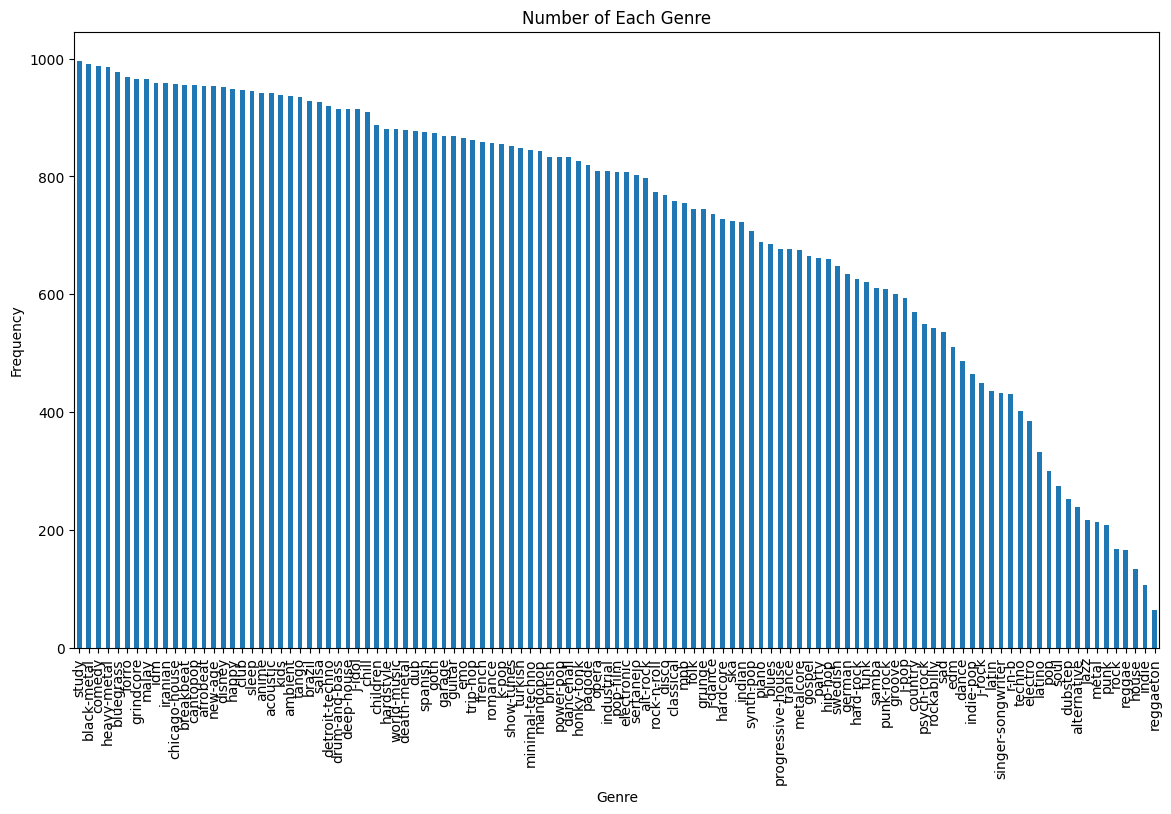

In [35]:
ax = df['track_genre'].value_counts().plot(kind='bar', 
                                            figsize=(14,8),
                                            title="Number of Each Genre")
ax.set_xlabel("Genre")
ax.set_ylabel("Frequency")

Because of how large our dataset currently is, generating a scatterplot between danceability and energy resultsin an extremely messy graph that does not provide much information. Thus, we will generate scatterplots for a few subsets of the DataFrame based on genre. To do this, we will take the top 4 genres, tango, sertanejo, sleep, and world-music, and generate a scatterplot of danceability and energy for each of the genres. This will allow us to see trends between each genre, if there exist any trends. 

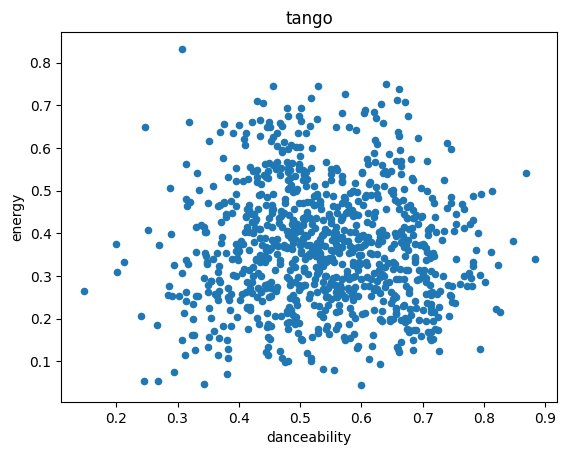

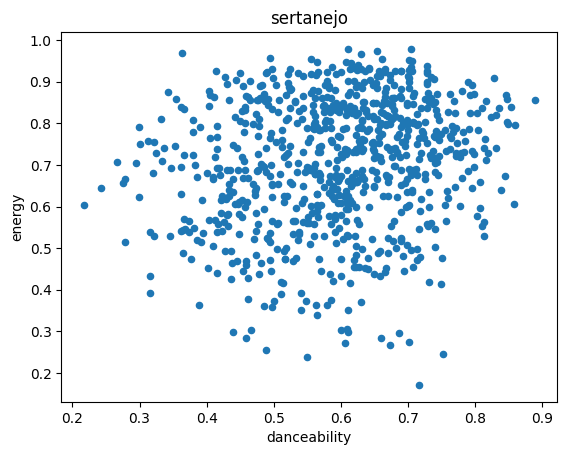

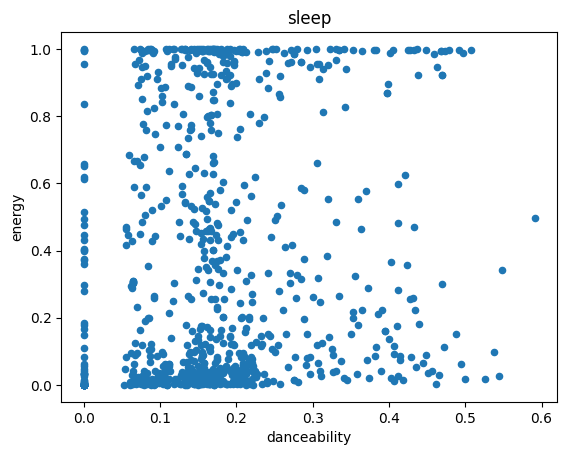

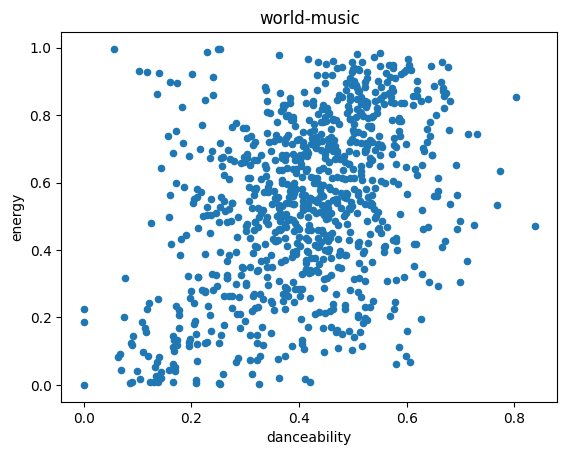

In [36]:

df.loc[df['track_genre'].eq('tango')].plot.scatter(x='danceability',y='energy', title = 'tango')
df.loc[df['track_genre'].eq('sertanejo')].plot.scatter(x='danceability',y='energy', title = 'sertanejo')
df.loc[df['track_genre'].eq('sleep')].plot.scatter(x='danceability',y='energy', title = 'sleep')
df.loc[df['track_genre'].eq('world-music')].plot.scatter(x='danceability',y='energy', title = 'world-music')

plt.show()

From the 4 scatterplots generated, we can see that there is a weak correlation between danceability and energy for all of the genres. We can see a slight positive correlation between the 2 variables for tango, sertanejo, and world-music. However, there appears to be no correlation between the 2 variables for sleep music. 

The next step of our exploratory data analysis will be to see if there exists a relationship between popularity and danceabilty and popularity and energy for the genres. We will be performing a similar analysis using the same 4 genres as above. 

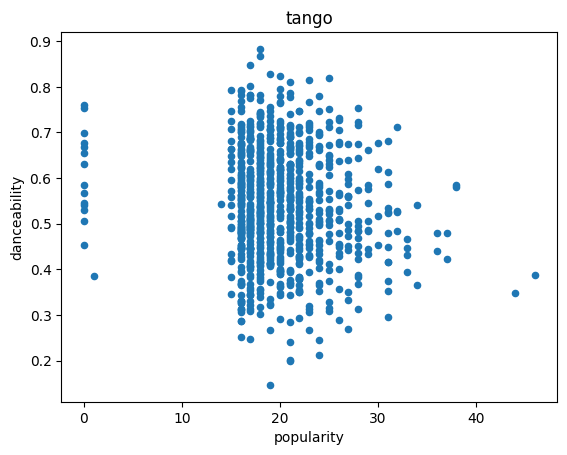

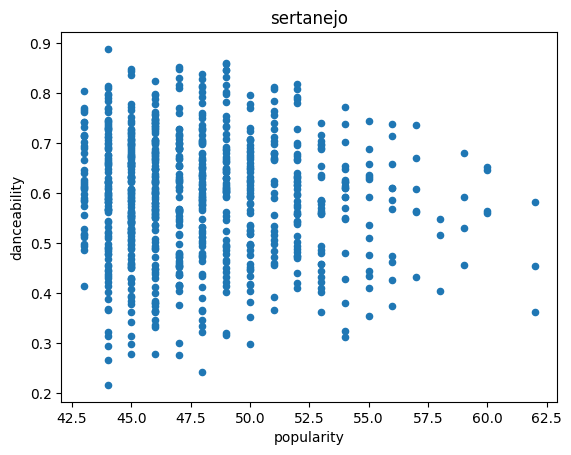

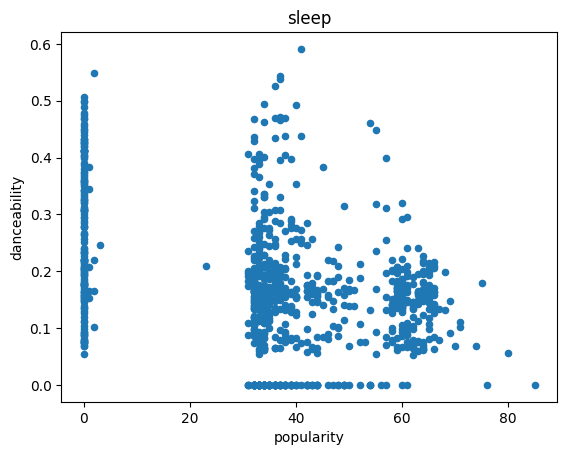

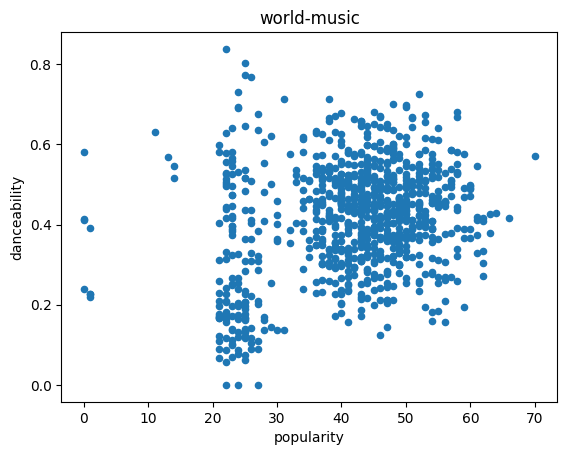

In [37]:
df.loc[df['track_genre'].eq('tango')].plot.scatter(x='popularity',y='danceability', title = 'tango')
df.loc[df['track_genre'].eq('sertanejo')].plot.scatter(x='popularity',y='danceability', title = 'sertanejo')
df.loc[df['track_genre'].eq('sleep')].plot.scatter(x='popularity',y='danceability', title = 'sleep')
df.loc[df['track_genre'].eq('world-music')].plot.scatter(x='popularity',y='danceability', title = 'world-music')

plt.show()

The relationships between popularity and danceability are interesting for each of the genres. With tango, the popularity appears to be in the 15-40 range but the danceability varies from low to high, regardless of how popular a song is. For sertanejo, the popularity is on the higher end ranging from 42.5 to 62.5 but similarly, the danceability also varies from low to high. Sleep music appears to have a slight negative correlation but the relationship still varies across values. World-music appears to have a slight postive correlation but there is still a lot of variability in danceability for the same popularity levels. 

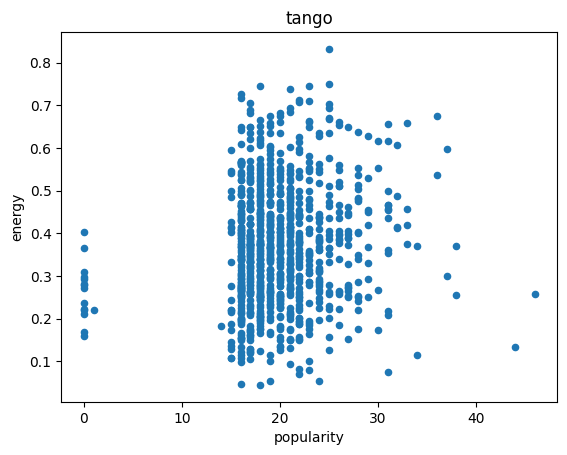

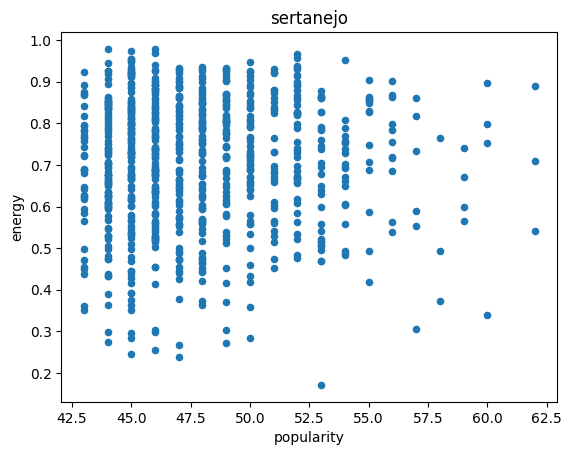

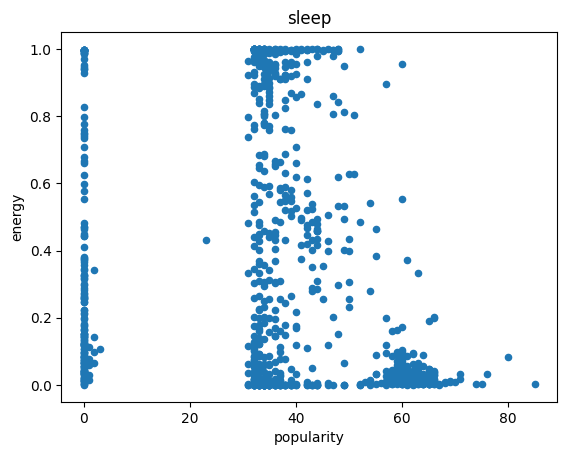

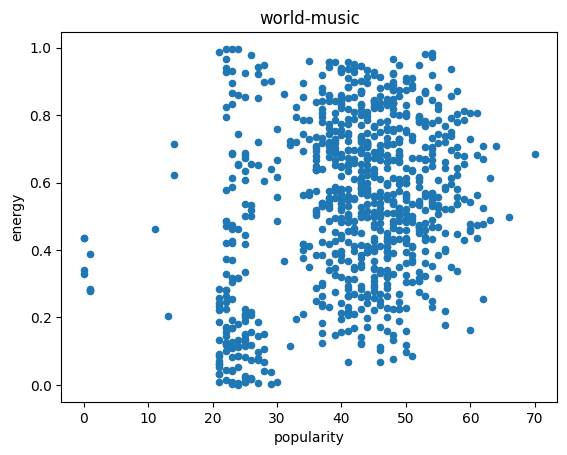

In [38]:
df.loc[df['track_genre'].eq('tango')].plot.scatter(x='popularity',y='energy', title = 'tango')
df.loc[df['track_genre'].eq('sertanejo')].plot.scatter(x='popularity',y='energy', title = 'sertanejo')
df.loc[df['track_genre'].eq('sleep')].plot.scatter(x='popularity',y='energy', title = 'sleep')
df.loc[df['track_genre'].eq('world-music')].plot.scatter(x='popularity',y='energy', title = 'world-music')

plt.show()

Like popularity and danceability, the relationships between danceability and energy also vary greatly within each of the genres. There do not appear to be any correlations within each of the genres and the energy for a given popularity also varies a lot. 

# Proposed Solution

Our solution to the problem of organic machine recommendation systems is the implementation of both batch and stochastic gradient descent methods, as well as k fold cross validation to create a system that is able to recommend things organically. Since our dataset contains much of the data regarding songs that we already need, batch gradient descent is well suited to create a principle set of weights for the algorithm to use, which can then be updated in real time using stochastic gradient descent. In this manner, the online nature of stochastic gradient descent will allow for the recommendation system to evolve with the users' preferences, and thus grow from the hot start generated by the batch gradient descent. The lighter computational complexity of stochastic gradient descent allows for the use of k folds cross validation as well, allowing us to score new recommendations based on theorized metrics and determine how well the model is operating. By doing so, the stochastic algorithm weights can be changed if it is measured that recommendations do poorly, or reinforced if recommendations do well. In this manner, the algorithm can be tested, and would be viable to solving the issue of organic recommendation.

# Evaluation Metrics
Given the context of predicting new music content, the evaluation metric we will be using is accuracy. This is because we want to determine if the music that our machine learning model is predicting is actually music that makes sense to be played. One possible way to determine how accurate our model is to create our own playlists/sets of songs and determining whether the music predicted by our model falls in that playlist. 

We also plan to play around with confusion matrices and calculating other metrics like recall, precision, and F1 scores to see what those results could tell us and how they could possibly be used to better our model. 

accuracy = (TP + TN) / (P + N)

recall = TP / P 

precision = TP / PP

F1 score = (2 * PPV * TPR) / (PPV + TPR)

# Results

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5 

Maybe you do model selection again, but using a different kind of metric than before?

## K-Nearest Neighbors Algorithm

The first approach that we decided to take when creating a Spotify recommendation system was to use KNN to determine what songs to recommend based on an initial query. We decided on a k = 10 value to see what 10 songs would be recommended.

In [45]:
# Add one-hot encoding for categorical variables
bool_var = df.select_dtypes(include= ['boolean'])

encoder = preprocessing.LabelEncoder()
label = bool_var.apply(encoder.fit_transform)
df['explicit'] = encoder.fit_transform(df['explicit'])
df['genre_code'] = encoder.fit_transform(df['track_genre'])

Preliminary Results show that our dataset has duplicate values within it. Using the test case of Elvis Presley's "Cant Help Falling In Love" we find that there is three identical songs listed in the dataset, which would skew our KNN algorithm.

For this initial test, we have chosen to only include the features: explicit, danceability, energy, loudness, mode, speechiness, liveness,	tempo, time_signature, genre_code in order to get similar music to the original query that we sent into the model. This is due to the fact that popularity and duration was being favored more than the other features leading to songs from wildly different genres being included in the recommendation (one test had heavy metal included with lullaby songs).

However, upon further investigation, we believe that we should normalize the features and reintroduce duration and popularity to the model to see if the recommendations improve at all.

In [46]:
predf = df.drop(columns = ['artists', 'popularity','track_genre','track_name','instrumentalness', 'duration_ms'], axis = 1)
preprocessing.normalize(predf, norm='l2')
predf.head()

,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,time_signature,genre_code
0,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.3580,0.715,87.917,4,0
1,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.1010,0.267,77.489,4,0
2,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.1170,0.120,76.332,4,0
3,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.1320,0.143,181.740,3,0
4,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.0829,0.167,119.949,4,0


In [47]:
df[df['artists'] == 'Aimer'].iloc[0]

artists                Aimer
track_name              残響散歌
popularity                77
duration_ms           184893
explicit                   0
danceability           0.367
energy                 0.896
key                       11
loudness              -4.002
mode                       1
speechiness            0.091
acousticness        0.000627
instrumentalness         0.0
liveness               0.207
valence                 0.38
tempo                170.863
time_signature             4
track_genre                5
genre_code                 5
Name: 5021, dtype: object

To provide an example of what KNN would look like for Spotify recommendations, we showed a query of Drake to see what 10 songs would be recommended if we wanted to listen to something similar to Drake. The results are shown below. 

In [48]:
#Copying 1 song here from predf due to large dataset size - can be replaced with mean album parameters later with spotipy
example_user = predf[df['artists'] == 'Drake'].iloc[0]
k = 10
model = NearestNeighbors(n_neighbors=k, algorithm="auto", metric='euclidean')

In [49]:
model.fit(predf)
distances, indices = model.kneighbors([example_user])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [17]:
recommendations = indices[0]

recommended_songs = df.iloc[recommendations[0:2], :]
# print(recommended_songs)
test=[]
for index in recommendations[0:2]:
    example_user = predf.iloc[index]
    distances, indices = model.kneighbors([example_user])
    test.append(indices[0][:])
test=np.array(test)
test=test.flatten()
recommended_songs = df.iloc[test, :]
recommended_songs['combined'] = recommended_songs['artists'] + recommended_songs['track_name']
recommended_songs = recommended_songs.drop_duplicates(subset=['combined'], keep='first')
recommended_songs=recommended_songs.drop(columns=['combined'], axis=1)

recommended_songs.head


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/var/folders/dv/0l29pvvs4fj8xv1vqhktpf3r0000gn/T/ipykernel_51031/2048850804.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_songs['combined'] = recommended_songs['artists'] + recommended_songs['track_name']


<bound method NDFrame.head of                                            artists  \
51453                                 Travis Scott   
51250                                        Drake   
51670                             Sidhu Moose Wala   
52906                                Pete Bernhard   
52186                                 George Jones   
51524                                Ty Dolla $ign   
52973                                Hank Williams   
51030  Akhil;Dhvani Bhanushali;Abhijit Vaghani;Bob   
51071              AP Dhillon;Shinda Kahlon;Gminxr   
50426                                   Almafuerte   
52478                                Hank Williams   

                         track_name  popularity  duration_ms  explicit  \
51453           HIGHEST IN THE ROOM          82       175720         1   
51250                    God's Plan          84       198973         1   
51670             Its All About You          58       243157         0   
52906                  8t

Text(0, 0.5, 'Frequency')

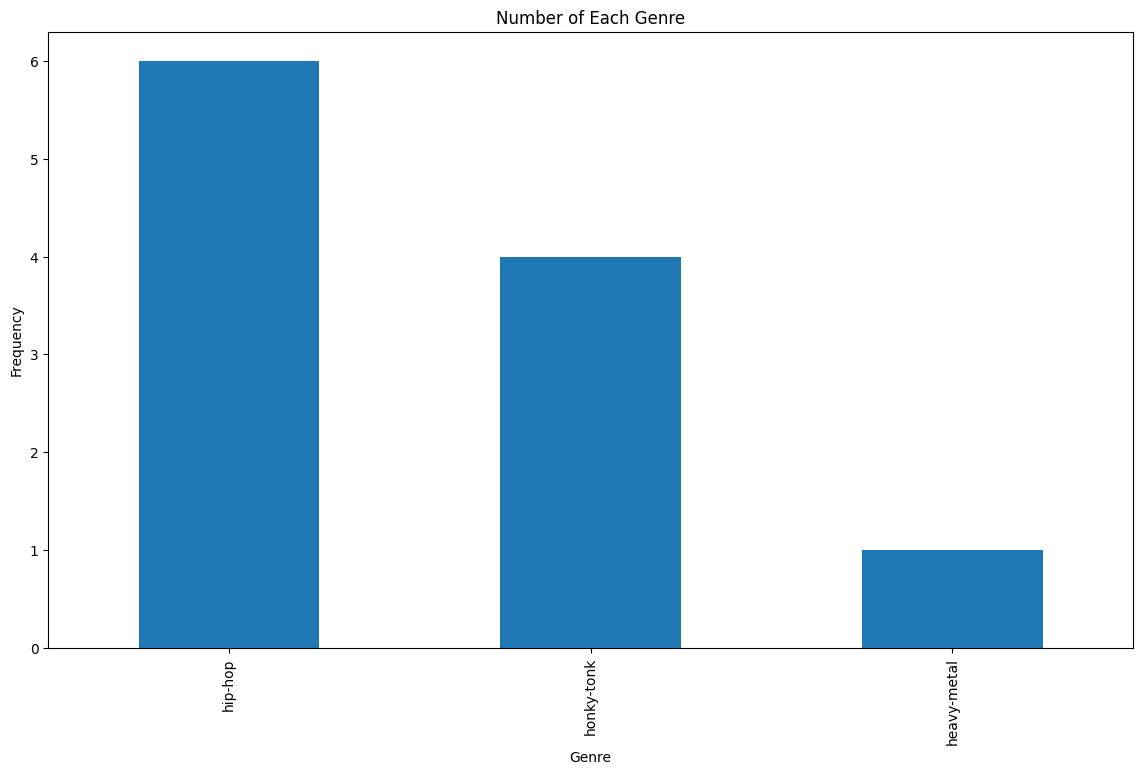

In [50]:
ax = recommended_songs['track_genre'].value_counts().plot(kind='bar', 
                                            figsize=(14,8),
                                            title="Number of Each Genre")
ax.set_xlabel("Genre")
ax.set_ylabel("Frequency")


Based on the results shown above, we can see that 6 out of 10 of our recommendations were hip-hop songs, which makes sense given that Drake is a hip-hop artist. However, there were some other genres represented such as honky-tonk and heavy-metal, which might show that KNN will recommend songs that aren't entirely what you may expect from a recommendation since honky-tonk, for example, is more of a country music genre. 

## K-Fold Cross Validation

The next approach that we wanted to test out was to use K-fold cross validation to see if a linear regression model would be useful in building a Spotify recommendation system. Based on the results, we get about a 0.456 average cross-validation score across 10 folds, which is pretty low given that there are thousands of songs to choose from in our dataset that would lead to better Spotify recommendations. However, based on the following models presented after this section, linear regression is more likely one of the better models for Spotify recommendations since it has a better performance. 

0.4564767144596359


## Logistic Regression and SVM Implementation

Based on feedback from our TA Stephen, we decided to implement an Logistic Regression and SVM into the recommendation system. However, because we don't have a means for binary classification in this dataset and we lack the means to get access to the data we would need to create it, we are making a one versus rest classifier for the different features in the dataset.

In [ ]:
#import packages
import numpy as np
import pandas as pd
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import time
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#reassigning for simplicity
df = pd.read_csv('dataset.csv')
df = df.drop(columns=['Unnamed: 0','track_id', 'album_name'], axis=1)

#remove dupes
df=df.drop_duplicates()
#convert to numeric for multiclass
codes, unique = pd.factorize(df.track_genre)
df.track_genre = codes

traindf = df

#clean data for training
traindf =traindf.drop(columns = ['track_name', 'artists','track_genre'])
traindf=(traindf-traindf.mean())/traindf.std()
traindf = traindf.astype(np.float32)
codes, unique = pd.factorize(df.explicit)
traindf.explicit= codes
traindf.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1.764268,0.006293,0,0.638686,-0.720265,-1.210282,0.307535,-1.316467,0.534643,-0.846104,-0.518499,0.738159,0.947083,-1.150742,0.219839
1,0.920756,-0.740482,0,-0.834544,-1.888763,-1.210282,-1.763324,0.759602,-0.085173,1.833769,-0.518485,-0.593671,-0.779766,-1.499003,0.219839
2,1.014479,-0.176495,0,-0.730957,-1.124288,-1.491510,-0.282390,0.759602,-0.276601,-0.311812,-0.518502,-0.510755,-1.346388,-1.537643,0.219839
3,1.670544,-0.258426,0,-1.720784,-2.310215,-1.491510,-2.016036,0.759602,-0.456877,1.776674,-0.518278,-0.433022,-1.257733,1.982637,-2.076432
4,2.186024,-0.286803,0,0.304907,-0.791563,-0.929055,-0.271926,0.759602,-0.305408,0.466487,-0.518502,-0.687469,-1.165223,-0.080979,0.219839


For our logistic model, because there are many ways to determine if a recommendation is "accurate" we decided to train, test, and split our data based on the genre variable in order to train and test our model. We believe that genre is one of the most imporant features to consider when deciding if a recommendation is good or not so that is why we decided to split on it. 

In [22]:
# Train the Logistic model
tic = time.time()
X_train,X_test,y_train,y_test = train_test_split(traindf, df.track_genre, test_size = 0.33)
clf = OneVsRestClassifier(LogisticRegression()).fit(X_train, y_train)
toc = time.time()
print(toc-tic)

37.50892972946167


0.2081656938856463


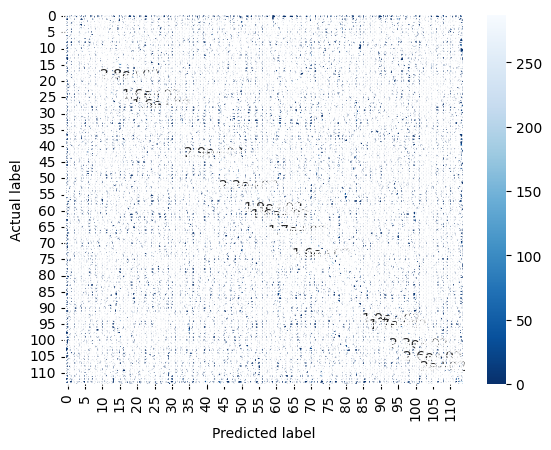

In [23]:
#Test
y_pred = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
score =  metrics.accuracy_score(y_test, y_pred)
print(score)

We can see that the accuracy score for the logistic model is 0.208, which is very low. Thus, logistic regression probably is not the best model for Spotify recommendations. Moving on, we also decided to use an SVM, also with train-test data split according to genre, to see if it's performance would be any better. 

In [24]:
#Train the SVM model
tic = time.time()
X_train,X_test,y_train,y_test = train_test_split(traindf,df.track_genre,test_size = 0.33)
clf = OneVsRestClassifier(SVC()).fit(X_train, y_train)
toc = time.time()
print(toc-tic)

1840.761645078659


0.23465744885816286


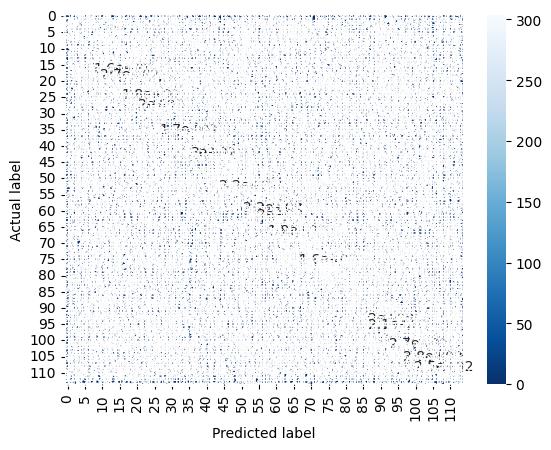

In [25]:
#Test
y_pred = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
score =  metrics.accuracy_score(y_test, y_pred)
print(score)

We can see that an SVM is only slightly better than a logistic regression with an accuracy score of 0.235. Because it is difficult to determine what an "accurate" recommendation is, this is most likely the reason why our accuracy scores have been so low. 

## Neural Net Implementation

The last model that we wanted to test for our Spotify recommendation system was Neural Networks. 

In [ ]:
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense, Dropout, Conv1D, Activation, BatchNormalization, MaxPooling1D, Flatten
from keras.utils.np_utils import to_categorical

In [ ]:
#train test split
X = traindf.values
y = df.track_genre
y_cat = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.33, random_state=42)

#### Initial Model test - using relu, 8 epochs and limited layers, sgd

In [ ]:
model = Sequential()
model.add(Dense(60, activation='relu', input_shape=(15,)))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(114, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 60)                960       
                                                                 
 dense_47 (Dense)            (None, 15)                915       
                                                                 
 dropout_5 (Dropout)         (None, 15)                0         
                                                                 
 dense_48 (Dense)            (None, 114)               1824      
                                                                 
Total params: 3,699
Trainable params: 3,699
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train,epochs=8, batch_size=1, verbose=1)

Epoch 1/8
71655/71655 [==============================] - 60s 828us/step - loss: 3.6858 - accuracy: 0.1342
Epoch 2/8
71655/71655 [==============================] - 60s 835us/step - loss: 3.4362 - accuracy: 0.1706
Epoch 3/8
71655/71655 [==============================] - 60s 843us/step - loss: 3.3852 - accuracy: 0.1781
Epoch 4/8
71655/71655 [==============================] - 60s 841us/step - loss: 3.3581 - accuracy: 0.1812
Epoch 5/8
71655/71655 [==============================] - 60s 837us/step - loss: 3.3353 - accuracy: 0.1873
Epoch 6/8
71655/71655 [==============================] - 59s 826us/step - loss: 3.3421 - accuracy: 0.1873
Epoch 7/8
71655/71655 [==============================] - 59s 828us/step - loss: 3.3483 - accuracy: 0.1862
Epoch 8/8
71655/71655 [==============================] - 60s 836us/step - loss: 3.3465 - accuracy: 0.1881


In [ ]:
y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test,verbose=2)
print(score)

As we can see, the model caps at around 19%, with no real improvement. The rate of improvement also decreased, so adding more epochs will have diminishing results

#### More complex model - switch to adam, softmax and more layers


In [ ]:
model = Sequential()

model.add(Conv1D(64,(1), padding="same", input_shape=(15,1)))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling1D(pool_size=(2)))

model.add(Dense(60, activation='relu', input_shape=(15,)))
model.add(Dense(15, activation='relu'))

model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(114, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_11 (Conv1D)          (None, 15, 64)            128       
                                                                 
 activation_7 (Activation)   (None, 15, 64)            0         
                                                                 
 batch_normalization_7 (Batc  (None, 15, 64)           256       
 hNormalization)                                                 
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 7, 64)            0         
 g1D)                                                            
                                                                 
 dense_71 (Dense)            (None, 7, 60)             3900      
                                                                 
 dense_72 (Dense)            (None, 7, 15)           

In [ ]:
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

Epoch 1/20
71655/71655 [==============================] - 79s 1ms/step - loss: 3.9148 - accuracy: 0.1134
Epoch 2/20
71655/71655 [==============================] - 79s 1ms/step - loss: 3.5816 - accuracy: 0.1607
Epoch 3/20
71655/71655 [==============================] - 79s 1ms/step - loss: 3.4982 - accuracy: 0.1728
Epoch 4/20
71655/71655 [==============================] - 80s 1ms/step - loss: 3.4539 - accuracy: 0.1804
Epoch 5/20
71655/71655 [==============================] - 78s 1ms/step - loss: 3.4284 - accuracy: 0.1858
Epoch 6/20
71655/71655 [==============================] - 80s 1ms/step - loss: 3.4155 - accuracy: 0.1894
Epoch 7/20
71655/71655 [==============================] - 78s 1ms/step - loss: 3.4020 - accuracy: 0.1904
Epoch 8/20
71655/71655 [==============================] - 78s 1ms/step - loss: 3.3909 - accuracy: 0.1905
Epoch 9/20
71655/71655 [==============================] - 78s 1ms/step - loss: 3.3891 - accuracy: 0.1936
Epoch 10/20
71655/71655 [==============================

In [ ]:
y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test,verbose=2)
print(score)

1103/1103 [==============================] - 1s 960us/step
1103/1103 - 1s - loss: 3.5142 - accuracy: 0.1953 - 1s/epoch - 1ms/step
[3.5142123699188232, 0.1953306496143341]


# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

The most intuitive approach for our Spotify recommendation system was to use KNN since the algorithm is able to query a song and then recommend the 10 closest songs that are similar to the original query. Based on the Drake example that we provided, we showed that KNN was able to recommend songs that are a similar genre to the original query but we also wanted to test out several other models to see if using a different model would produce better results. However, we also recognize that Spotify song recommendations are not a binary decision. This is because recommendations inherently aren't supposed to be "absolutely correct" since there can be multiple good recommendations for just one single song. Thus, when we were doing train-test-splits, we decided to split our data based on genre but even then it's not entirely possible to assess "accuracy" since accuracy is an ambiguous term for our project. 

When we tried using different models like linear regression, logistic regression, SVM, and Neural Networks, the performances of each model were fairly low.

### Limitations
One limitation that we had with our model was determining what "accuracy" meant. Because our model is being used to recommend songs from Spotify, there isn't an entirely "right" answer since one songs could have multiple good recommendations. A good recommendation could be classifed as a song and its recommended song having the same artist and genre, the same artist and genre and similar danceability/energy, or a similar artist but the same genre. More data could have changed the nature of this project because it could've been helpful to have an actual real-life dataset that contained songs and songs that Spotify would recommend based on the original song. However, we couldn't obtain this data. Exploring more hyperparameters probably wouldn't change how we approached this project. Because song recommendations are so subjective, we had to determine some objective ways to make recommendations and we mainly tried basing that off of artist and genre. 

### Ethics & Privacy

In order to generate the data that the model will take to generate a recommended playlist, the user has to input information regarding the types of songs they listen to, whether they're fine with explicitness, and other variables such as if they want their playlist to be dancable. In order for the user to understand how their data is being used, we could plan on writing explicitly how their account would be used in conjunction with our project and stick to those written conditions.

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Sanchez, Johny. “Algorithms and Curated Playlist Effect on Music Streaming Satisfaction ...” Texas Christian University, https://repository.tcu.edu/bitstream/handle/116099117/22417/Sanchez__Johny-Honors_Project.pdf. <br> 
<a name="admonishnote"></a>2.[^](#admonish): Anderson, Ashton, et al. “Algorithmic Effects on the Diversity of Consumption on Spotify.” University of Toronto, https://www.cs.utoronto.ca/~ashton/pubs/alg-effects-spotify-www2020.pdf.<br>